<a href="https://colab.research.google.com/github/minita-san/miRNA-visualization-/blob/main/miRNA%20visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Experiment 1 data
exp1_data = [
    ["Sample 1", "miR16", 25.682],
    ["Sample 1", "miR21", 36.516],
    ["Sample 1", "miR195", 30.906],
    ["Sample 1", "miR425", 23.841],
    ["Sample 3", "miR16", 26.016],
    ["Sample 3", "miR21", 29.239],
    ["Sample 3", "miR195", 31.483],
    ["Sample 3", "miR425", 24.016],
    ["Sample 5", "miR16", 26.162],
    ["Sample 5", "miR21", 36.187],
    ["Sample 5", "miR195", 31.564],
    ["Sample 5", "miR425", 23.930],
    ["Sample 7", "miR16", 26.593],
    ["Sample 7", "miR21", 34.477],
    ["Sample 7", "miR195", 32.139],
    ["Sample 7", "miR425", 24.693]
]
exp1_df = pd.DataFrame(exp1_data, columns=["Sample", "Target", "Ct_Exp1"])

# Experiment 2 data
exp2_data = [
    ["Sample 1", "miR16", 18.558],
    ["Sample 1", "miR21", 24.140],
    ["Sample 1", "miR195", 21.039],
    ["Sample 1", "miR425", 21.998],
    ["Sample 3", "miR16", 18.030],
    ["Sample 3", "miR21", 24.389],
    ["Sample 3", "miR195", 20.793],
    ["Sample 3", "miR425", 21.208],
    ["Sample 5", "miR16", 20.172],
    ["Sample 5", "miR21", 26.055],
    ["Sample 5", "miR195", 21.416],
    ["Sample 5", "miR425", 23.473],
    ["Sample 7", "miR16", 19.885],
    ["Sample 7", "miR21", 26.438],
    ["Sample 7", "miR195", 22.336],
    ["Sample 7", "miR425", 22.910]
]
exp2_df = pd.DataFrame(exp2_data, columns=["Sample", "Target", "Ct_Exp2"])

# Merge the two experiments
merged_df = pd.merge(exp1_df, exp2_df, on=["Sample", "Target"], how="outer")

# Sort for better readability
merged_df = merged_df.sort_values(by=["Sample", "Target"]).reset_index(drop=True)

print(merged_df)




      Sample  Target  Ct_Exp1  Ct_Exp2
0   Sample 1   miR16   25.682   18.558
1   Sample 1  miR195   30.906   21.039
2   Sample 1   miR21   36.516   24.140
3   Sample 1  miR425   23.841   21.998
4   Sample 3   miR16   26.016   18.030
5   Sample 3  miR195   31.483   20.793
6   Sample 3   miR21   29.239   24.389
7   Sample 3  miR425   24.016   21.208
8   Sample 5   miR16   26.162   20.172
9   Sample 5  miR195   31.564   21.416
10  Sample 5   miR21   36.187   26.055
11  Sample 5  miR425   23.930   23.473
12  Sample 7   miR16   26.593   19.885
13  Sample 7  miR195   32.139   22.336
14  Sample 7   miR21   34.477   26.438
15  Sample 7  miR425   24.693   22.910


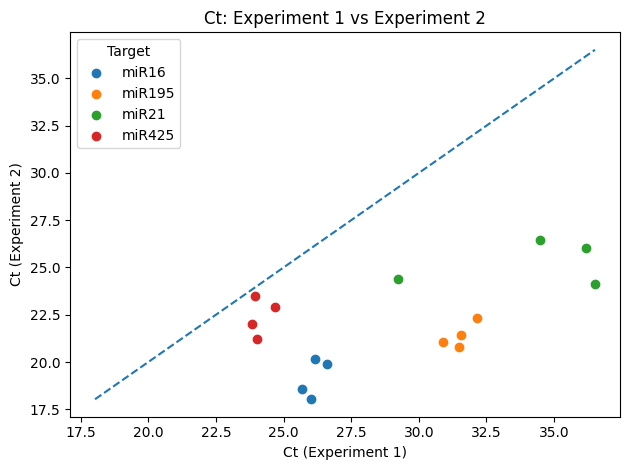

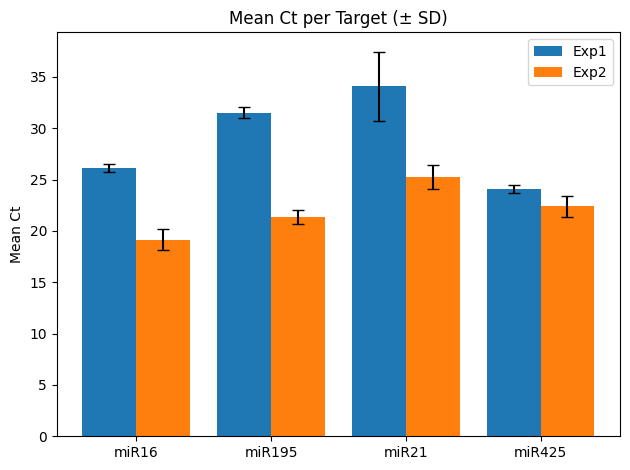

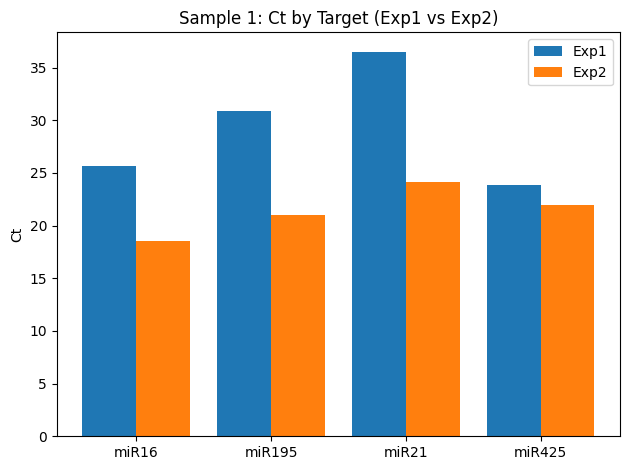

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Build the data ----------
exp1_data = [
    ["Sample 1", "miR16", 25.682],
    ["Sample 1", "miR21", 36.516],
    ["Sample 1", "miR195", 30.906],
    ["Sample 1", "miR425", 23.841],
    ["Sample 3", "miR16", 26.016],
    ["Sample 3", "miR21", 29.239],
    ["Sample 3", "miR195", 31.483],
    ["Sample 3", "miR425", 24.016],
    ["Sample 5", "miR16", 26.162],
    ["Sample 5", "miR21", 36.187],
    ["Sample 5", "miR195", 31.564],
    ["Sample 5", "miR425", 23.930],
    ["Sample 7", "miR16", 26.593],
    ["Sample 7", "miR21", 34.477],
    ["Sample 7", "miR195", 32.139],
    ["Sample 7", "miR425", 24.693]
]
exp1_df = pd.DataFrame(exp1_data, columns=["Sample", "Target", "Ct_Exp1"])

exp2_data = [
    ["Sample 1", "miR16", 18.558],
    ["Sample 1", "miR21", 24.140],
    ["Sample 1", "miR195", 21.039],
    ["Sample 1", "miR425", 21.998],
    ["Sample 3", "miR16", 18.030],
    ["Sample 3", "miR21", 24.389],
    ["Sample 3", "miR195", 20.793],
    ["Sample 3", "miR425", 21.208],
    ["Sample 5", "miR16", 20.172],
    ["Sample 5", "miR21", 26.055],
    ["Sample 5", "miR195", 21.416],
    ["Sample 5", "miR425", 23.473],
    ["Sample 7", "miR16", 19.885],
    ["Sample 7", "miR21", 26.438],
    ["Sample 7", "miR195", 22.336],
    ["Sample 7", "miR425", 22.910]
]
exp2_df = pd.DataFrame(exp2_data, columns=["Sample", "Target", "Ct_Exp2"])

merged_df = (
    pd.merge(exp1_df, exp2_df, on=["Sample", "Target"], how="outer")
      .sort_values(["Sample", "Target"])
      .reset_index(drop=True)
)

# ---------- 1) Scatter: Ct_Exp1 vs Ct_Exp2 (one point per Sample-Target) ----------
plt.figure()
# plot each target separately so you get a legend (matplotlib will auto-pick colors)
for tgt, sub in merged_df.groupby("Target"):
    plt.scatter(sub["Ct_Exp1"], sub["Ct_Exp2"], label=tgt)

# identity line y=x for quick agreement check
all_vals = pd.concat([merged_df["Ct_Exp1"], merged_df["Ct_Exp2"]], ignore_index=True)
vmin, vmax = all_vals.min(), all_vals.max()
plt.plot([vmin, vmax], [vmin, vmax], linestyle="--")

plt.xlabel("Ct (Experiment 1)")
plt.ylabel("Ct (Experiment 2)")
plt.title("Ct: Experiment 1 vs Experiment 2")
plt.legend(title="Target")
plt.tight_layout()
# plt.savefig("scatter_exp1_vs_exp2.png", dpi=300)
plt.show()

# ---------- 2) Grouped bar: mean Ct per Target with error bars ----------
summary = merged_df.groupby("Target").agg(
    mean1=("Ct_Exp1", "mean"),
    std1=("Ct_Exp1", "std"),
    mean2=("Ct_Exp2", "mean"),
    std2=("Ct_Exp2", "std"),
).reset_index()

x = range(len(summary))
width = 0.4

plt.figure()
plt.bar([i - width/2 for i in x], summary["mean1"], width, yerr=summary["std1"], capsize=4, label="Exp1")
plt.bar([i + width/2 for i in x], summary["mean2"], width, yerr=summary["std2"], capsize=4, label="Exp2")
plt.xticks(list(x), summary["Target"])
plt.ylabel("Mean Ct")
plt.title("Mean Ct per Target (± SD)")
plt.legend()
plt.tight_layout()
# plt.savefig("bar_mean_ct_by_target.png", dpi=300)
plt.show()

# ---------- 3) Per-sample grouped bar: compare Ct across targets within ONE sample ----------
sample_to_plot = "Sample 1"   # <-- change this to "Sample 3", "Sample 5", or "Sample 7"

sub = merged_df[merged_df["Sample"] == sample_to_plot].copy()
sub = sub.sort_values("Target")

x = range(len(sub))
width = 0.4

plt.figure()
plt.bar([i - width/2 for i in x], sub["Ct_Exp1"], width, label="Exp1")
plt.bar([i + width/2 for i in x], sub["Ct_Exp2"], width, label="Exp2")
plt.xticks(list(x), sub["Target"])
plt.ylabel("Ct")
plt.title(f"{sample_to_plot}: Ct by Target (Exp1 vs Exp2)")
plt.legend()
plt.tight_layout()
# plt.savefig(f"bar_{sample_to_plot.replace(' ', '_').lower()}_ct_by_target.png", dpi=300)
plt.show()



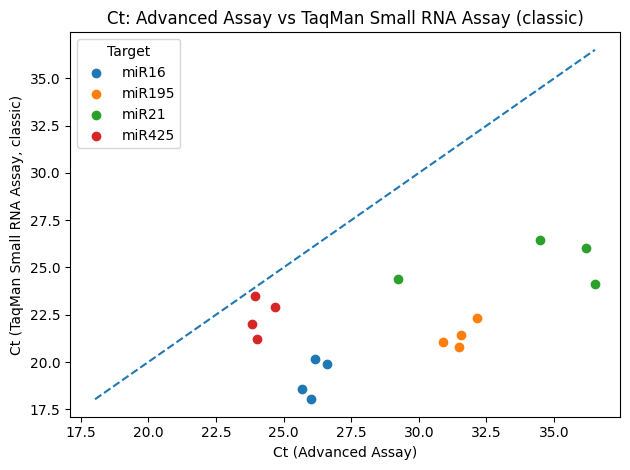

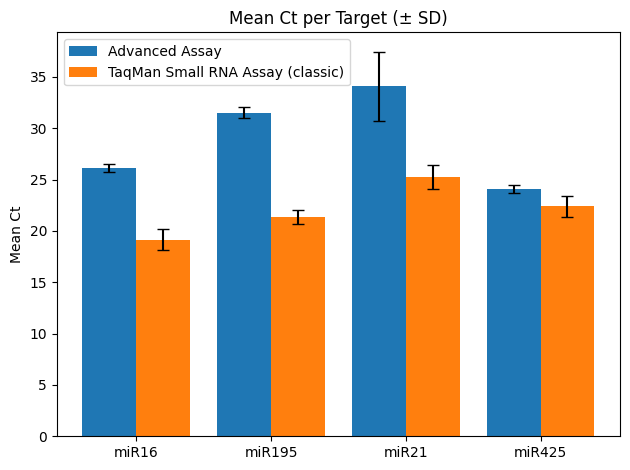

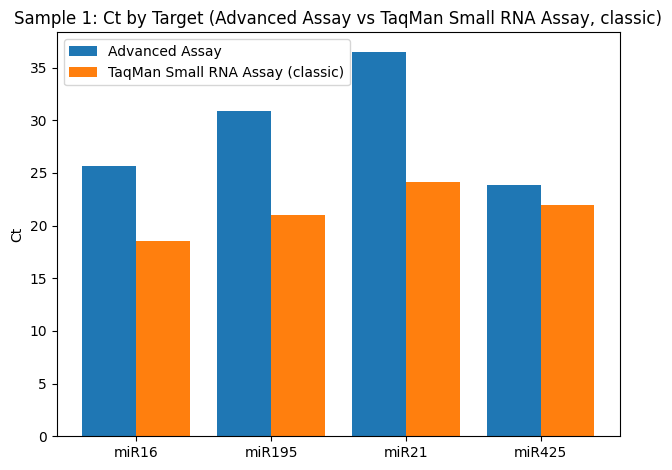

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Build the data ----------
exp1_data = [
    ["Sample 1", "miR16", 25.682],
    ["Sample 1", "miR21", 36.516],
    ["Sample 1", "miR195", 30.906],
    ["Sample 1", "miR425", 23.841],
    ["Sample 3", "miR16", 26.016],
    ["Sample 3", "miR21", 29.239],
    ["Sample 3", "miR195", 31.483],
    ["Sample 3", "miR425", 24.016],
    ["Sample 5", "miR16", 26.162],
    ["Sample 5", "miR21", 36.187],
    ["Sample 5", "miR195", 31.564],
    ["Sample 5", "miR425", 23.930],
    ["Sample 7", "miR16", 26.593],
    ["Sample 7", "miR21", 34.477],
    ["Sample 7", "miR195", 32.139],
    ["Sample 7", "miR425", 24.693]
]
exp1_df = pd.DataFrame(exp1_data, columns=["Sample", "Target", "Advanced Assay"])

exp2_data = [
    ["Sample 1", "miR16", 18.558],
    ["Sample 1", "miR21", 24.140],
    ["Sample 1", "miR195", 21.039],
    ["Sample 1", "miR425", 21.998],
    ["Sample 3", "miR16", 18.030],
    ["Sample 3", "miR21", 24.389],
    ["Sample 3", "miR195", 20.793],
    ["Sample 3", "miR425", 21.208],
    ["Sample 5", "miR16", 20.172],
    ["Sample 5", "miR21", 26.055],
    ["Sample 5", "miR195", 21.416],
    ["Sample 5", "miR425", 23.473],
    ["Sample 7", "miR16", 19.885],
    ["Sample 7", "miR21", 26.438],
    ["Sample 7", "miR195", 22.336],
    ["Sample 7", "miR425", 22.910]
]
exp2_df = pd.DataFrame(exp2_data, columns=["Sample", "Target", "TaqMan Small RNA Assay (classic)"])

merged_df = (
    pd.merge(exp1_df, exp2_df, on=["Sample", "Target"], how="outer")
      .sort_values(["Sample", "Target"])
      .reset_index(drop=True)
)

# ---------- 1) Scatter Plot ----------
plt.figure()
for tgt, sub in merged_df.groupby("Target"):
    plt.scatter(sub["Advanced Assay"], sub["TaqMan Small RNA Assay (classic)"], label=tgt)

# identity line
all_vals = pd.concat([merged_df["Advanced Assay"], merged_df["TaqMan Small RNA Assay (classic)"]], ignore_index=True)
vmin, vmax = all_vals.min(), all_vals.max()
plt.plot([vmin, vmax], [vmin, vmax], linestyle="--")

plt.xlabel("Ct (Advanced Assay)")
plt.ylabel("Ct (TaqMan Small RNA Assay, classic)")
plt.title("Ct: Advanced Assay vs TaqMan Small RNA Assay (classic)")
plt.legend(title="Target")
plt.tight_layout()
plt.show()

# ---------- 2) Grouped bar: Mean Ct per Target ----------
summary = merged_df.groupby("Target").agg(
    mean1=("Advanced Assay", "mean"),
    std1=("Advanced Assay", "std"),
    mean2=("TaqMan Small RNA Assay (classic)", "mean"),
    std2=("TaqMan Small RNA Assay (classic)", "std"),
).reset_index()

x = range(len(summary))
width = 0.4

plt.figure()
plt.bar([i - width/2 for i in x], summary["mean1"], width, yerr=summary["std1"], capsize=4, label="Advanced Assay")
plt.bar([i + width/2 for i in x], summary["mean2"], width, yerr=summary["std2"], capsize=4, label="TaqMan Small RNA Assay (classic)")
plt.xticks(list(x), summary["Target"])
plt.ylabel("Mean Ct")
plt.title("Mean Ct per Target (± SD)")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- 3) Per-sample grouped bar ----------
sample_to_plot = "Sample 1"  # Change to "Sample 3", "Sample 5", or "Sample 7"
sub = merged_df[merged_df["Sample"] == sample_to_plot].sort_values("Target")

x = range(len(sub))
width = 0.4

plt.figure()
plt.bar([i - width/2 for i in x], sub["Advanced Assay"], width, label="Advanced Assay")
plt.bar([i + width/2 for i in x], sub["TaqMan Small RNA Assay (classic)"], width, label="TaqMan Small RNA Assay (classic)")
plt.xticks(list(x), sub["Target"])
plt.ylabel("Ct")
plt.title(f"{sample_to_plot}: Ct by Target (Advanced Assay vs TaqMan Small RNA Assay, classic)")
plt.legend()
plt.tight_layout()
plt.show()
